In [1]:
import pandas as pd
import numpy as np
from insight_utils import bar_groups_chart, line_plot_column
from constants import FORMAT_MODIFIERS, LENGTH_MODIFIERS, DENSENESS_MODIFIERS, QUALITY_MODIFIERS, STRUCTURE_MODIFIERS

modifiers_path = "results/modifiers/gpt-3.5-turbo-16k/"
baseline_df = pd.read_csv("results/gpt4/baseline.csv")
format_alpha_df = pd.read_csv(modifiers_path + "alpha_format.csv")
format_1temp_df = pd.read_csv(modifiers_path + "format1temp.csv")
format_df = pd.read_csv(modifiers_path + "format.csv")
# length_df = pd.read_csv(modifiers_path + "length.csv")
# denseness_df = pd.read_csv(modifiers_path + "denseness.csv")
# structure_df = pd.read_csv(modifiers_path + "structure.csv")
# quality_df = pd.read_csv(modifiers_path + "quality.csv")



#### Format

In [2]:
# format_df2 = format_df.iloc[9:]
format_df.head()

,prompt_template,examples,num_examples,text,title,prompt,prediction,finish_reason,bert_score,rogue_1,...,neutral_contradiction_ratio,number_hallucinations,three_by_three,long_subheadings,long_bullets,geval_fluency,geval_relevance,geval_coherence,geval_consistency,config
0,3 subheadings with 3 bullet points,[[]],0,"When I think about the rise of AI, I'm reminde...",NaN,user:\nSummarize the text.\nText: ###\nWhen I ...,The Concentration of AI in Big Tech Companies\...,stop,[],[],...,0.0,0,1,1,5,0,0,0,0,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."
1,3 subheadings with 3 bullet points,[[]],0,"When I think about the rise of AI, I'm reminde...",NaN,user:\nSummarize the text.\nText: ###\nWhen I ...,The concentration of AI in big tech companies\...,stop,[],[],...,0.0,0,1,1,8,0,0,0,0,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."
2,"3 subheadings, each with 3 bullet points",[[]],0,"When I think about the rise of AI, I'm reminde...",NaN,user:\nSummarize the text.\nText: ###\nWhen I ...,Rise of AI and Concentration in Big Tech Compa...,stop,[],[],...,0.0,0,1,1,9,0,0,0,0,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."
3,"3 subheadings, each with 3 bullet points",[[]],0,"When I think about the rise of AI, I'm reminde...",NaN,user:\nSummarize the text.\nText: ###\nWhen I ...,Rise of AI and its concentration in big tech c...,stop,[],[],...,0.0,0,1,3,9,0,0,0,0,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."
4,3 x 3 subheadings and bullet points,[[]],0,"When I think about the rise of AI, I'm reminde...",NaN,user:\nSummarize the text.\nText: ###\nWhen I ...,Rise of AI and its concentration in big tech c...,stop,[],[],...,0.0,0,0,2,9,0,0,0,0,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."


In [3]:
for m in FORMAT_MODIFIERS:
    print(m)

3 subheadings with 3 bullet points
3 subheadings, each with 3 bullet points
3 x 3 subheadings and bullet points
3 by 3 subheadings with bullet points
3 subtitles with 3 bullet points
3 times 3 subtitles with bullet points
Three subheadings with three corresponding bullet points
Output must be three subheadings, each with three bullet points
Output format: three subheadings, each with three bullet points
Output format: three subtitles, each with three bullet points
Output format: three sub-points, each with three bullet points
Three subheadings, each with three bullet points
Three subsections containing three bullet points each
Three subheadings each accompanied by three bullet points
Three subtitles, each with three bullet points
Three main headings consisting of three bullet points rewritten as follows
Three main sections, each containing three key points
Three categories with three points each
Three sections headers, with each containing three bullet points
Three sections, each conta

In [4]:
format_df.describe()

,num_examples,title,slor,avg_error_count_score,errors,contradiction_ratio,neutral_contradiction_ratio,number_hallucinations,three_by_three,long_subheadings,long_bullets,geval_fluency,geval_relevance,geval_coherence,geval_consistency
count,870.0,0.0,870.0,870.0,870.0,870.0,870.0,870.0,870.000000,870.000000,870.000000,870.0,870.0,870.0,870.0
mean,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.457471,1.432184,5.983908,0.0,0.0,0.0,0.0
std,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.498475,1.056243,3.313635,0.0,0.0,0.0,0.0
min,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,2.000000,0.0,0.0,0.0,0.0
50%,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,7.000000,0.0,0.0,0.0,0.0
75%,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,2.000000,9.000000,0.0,0.0,0.0,0.0
max,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,3.000000,9.000000,0.0,0.0,0.0,0.0


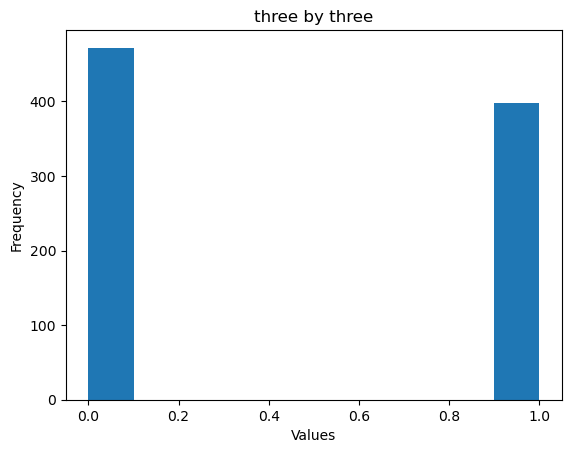

In [5]:
import matplotlib.pyplot as plt

# Create a histogram of a numerical column
plt.hist(format_df["three_by_three"])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("three by three")
plt.show()

# # Create a histogram of a numerical column
# plt.hist(format_df["long_subheadings"])
# plt.xlabel("Values")
# plt.ylabel("Frequency")
# plt.title("Long Subheadings")
# plt.show()

# # Create a scatter plot of two numerical columns
# plt.scatter(format_df["rogue_1"], in_context_df["rogue_L"])
# plt.xlabel("rogue_1")
# plt.ylabel("rogue_L")
# plt.title("Scatter Plot")
# plt.show()

In [7]:
dataframes = []

for modifier in FORMAT_MODIFIERS:
    modifier_df = format_df[format_df["prompt_template"] == modifier]
    dataframes.append(modifier_df)

print("####### 30 tries per modifier #######\n")

dic = {}

for i, df in enumerate(dataframes):
    success_rate = (df["three_by_three"].sum() / 30) * 100
    modifier = FORMAT_MODIFIERS[i]
    dic.update({modifier: round(success_rate)})

sorted_dic = dict(sorted(dic.items(), key=lambda item: item[1], reverse=True))
result_df = pd.DataFrame(sorted_dic.items(),columns=["Modifier", "Success Rate"])

print(result_df.style.to_latex())

####### 30 tries per modifier #######

\begin{tabular}{llr}
 & Modifier & Success Rate \\
0 & Three subtitles, each with three bullet points & 90 \\
1 & Output must be three subheadings, each with three bullet points & 87 \\
2 & Three titles, each containing three bullet points & 87 \\
3 & 3 subheadings with 3 bullet points & 80 \\
4 & Three subheadings each accompanied by three bullet points & 77 \\
5 & Format of output: three headings with three items listed under each heading & 77 \\
6 & 3 subheadings, each with 3 bullet points & 73 \\
7 & Three subheadings, each with three bullet points & 73 \\
8 & Three sections headers, with each containing three bullet points & 73 \\
9 & Three subsections containing three bullet points each & 67 \\
10 & Format for output: three headings, each containing three bullet points & 67 \\
11 & Format of output: three headings with three points listed under each heading & 63 \\
12 & Output format: three subheadings, each with three bullet points & 57 \\
